# <b> SYRIATEL CHURN ANALYSIS </b>

#### Author : Stella Kitur
--- 
### <b> Project Overview </b>
In this project I have utilised machine learning algorithms in order to identify any trends that can help in predicting whether a customer that is using SyriaTel will stop (churn) using the services. This is to help SyriaTel in their decision making process as well as in developing methods that might help to reduce the churn rate further.

## <b> Business Understanding </b>
### <b> Business Problem </b>
- Who is SyriaTel?
- Customer retention rate is key in the telecommunication domain 
- Important to know what features are leading to churn rate increase 
- What are the potential factors for churn?

#### <b>Objectives</b>
As the data scientist assigned to this project, what are your objectives?
1. Identify if there are certain features that can predict whether a customer will churn or not
2. Predict as accurately as possible using a model, whether a customer will churn



#### <b> Metrics of Success </b>
In this model, the metrics of success are outlined as follows :


## <b> Data Understanding </b>
In conducting this analysis, the CRISP-DM data science process was used.
There were : Outline important notes based on the dataset... etc. etc.

## <b> Import Libraries </b>

To start off this analysis, we will import the libraries that will be used in this notebook.

As well as including the necessary formatting for the data visualisations used throughout the notebook.

For convenience, the libraries have been categorised based on the function. 

In [1]:
# Import Libraries 

# imports
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
custom_color = custom_colors = ["#BE5A83", "#F2B6A0", "#FEF2F4"] #This is the color pallette for the notebook

#Stats


#Scikit imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load the data
# Display the shape of the data

df = pd.read_csv('data.csv')
print(df.shape)

(3333, 21)


## <b> Data Understanding </b>
Under this section, we will gain understanding of the dataset while also identifying if there are any missing/duplicated values before proceeding to conduct EDA (Exploratory Data Analysis) on the data to help us identify any key observations in the dataset. 

In [3]:
# Display the first 5 rows of the dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# Display the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### <b> Data Cleaning </b>

In [5]:
# Check for missing values and duplicated values 
print(df.isnull().sum())
print(f"There are {df.duplicated().sum()} duplicated values.")


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64
There are 0 duplicated values.


In [6]:
# We will change the datatype of area code from an int to an object

df['area code'] = df['area code'].astype(object)
df['area code'].dtype # Check if the change has been made


dtype('O')

In [7]:
# Explore the values in the state column

print(df.state.value_counts())
print(f"There are {df['state'].nunique()} values, this is because SyriaTel is based in the USA and there are {df['state'].nunique()} states")


WV    106
MN     84
NY     83
AL     80
OR     78
OH     78
WI     78
VA     77
WY     77
CT     74
VT     73
ID     73
MI     73
UT     72
TX     72
IN     71
KS     70
MD     70
NC     68
MT     68
NJ     68
CO     66
WA     66
NV     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ND     62
ME     62
NE     61
DE     61
OK     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64
There are 51 values, this is because SyriaTel is based in the USA and there are 51 states


In [8]:
# Drop the phone number column

df = df.drop('phone number',axis=1)
df.head() #inspect

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [9]:
# Define a function that calls the categorical columns in the dataset
def print_categorical_columns(df):
    categorical_cols = df.select_dtypes(include='object').columns.difference(['phone number'])
    for col in categorical_cols:
        print(col.upper())
        print(df[col].unique())
        print('_________________________\n')

# Call the function
print_categorical_columns(df)

AREA CODE
[415 408 510]
_________________________

INTERNATIONAL PLAN
['no' 'yes']
_________________________

STATE
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
_________________________

VOICE MAIL PLAN
['yes' 'no']
_________________________



#### <b> Label Encoding and One-Hot Encoding </b>

In [10]:
# Label Encoding the State column
# Label Encoding is preferred in this case as there are 51 unique values and will replace it with a unique integer.

Label_Encoder = LabelEncoder()
df['state'] = Label_Encoder.fit_transform(df['state'])
df['state']

0       16
1       35
2       31
3       35
4       36
        ..
3328     3
3329    49
3330    39
3331     6
3332    42
Name: state, Length: 3333, dtype: int64

In [11]:
# Convert categorical variables to binary representation
df["international plan"] = df["international plan"].map({"no": 0, "yes": 1})
df["voice mail plan"] = df["voice mail plan"].map({"no": 0, "yes": 1})
df['churn'] = df['churn'].map({False: 0, True: 1})

df.head(6)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,1,118,510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0


##### <b> Feature Engineering </b>

In [12]:
# Feature Engineering -- Total Expenditure 
# This will calculate the total expenditure for each customer


df['total expenditure'] = df['total day charge'] \
                        + df['total eve charge'] \
                        + df['total night charge'] \
                        + df['total intl charge']

df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total expenditure
0,16,128,415,0,1,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,75.56
1,35,107,415,0,1,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,59.24
2,31,137,415,0,0,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,62.29
3,35,84,408,1,0,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,66.80
4,36,75,415,1,0,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,52.09


### <b> Exploratory Data Analysis </b>

##### <b> Summary Statistics </b>

In [13]:
# Descriptive Summary Statistics 

df.describe()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total expenditure
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,26.059406,101.064806,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914,59.449754
std,14.824911,39.822106,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067,10.502261
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,22.930000
25%,14.000000,74.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000,52.380000
50%,26.000000,101.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000,59.470000
75%,39.000000,127.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000,66.480000
max,50.000000,243.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000,96.150000


##### <b> Distribution of Features</b>

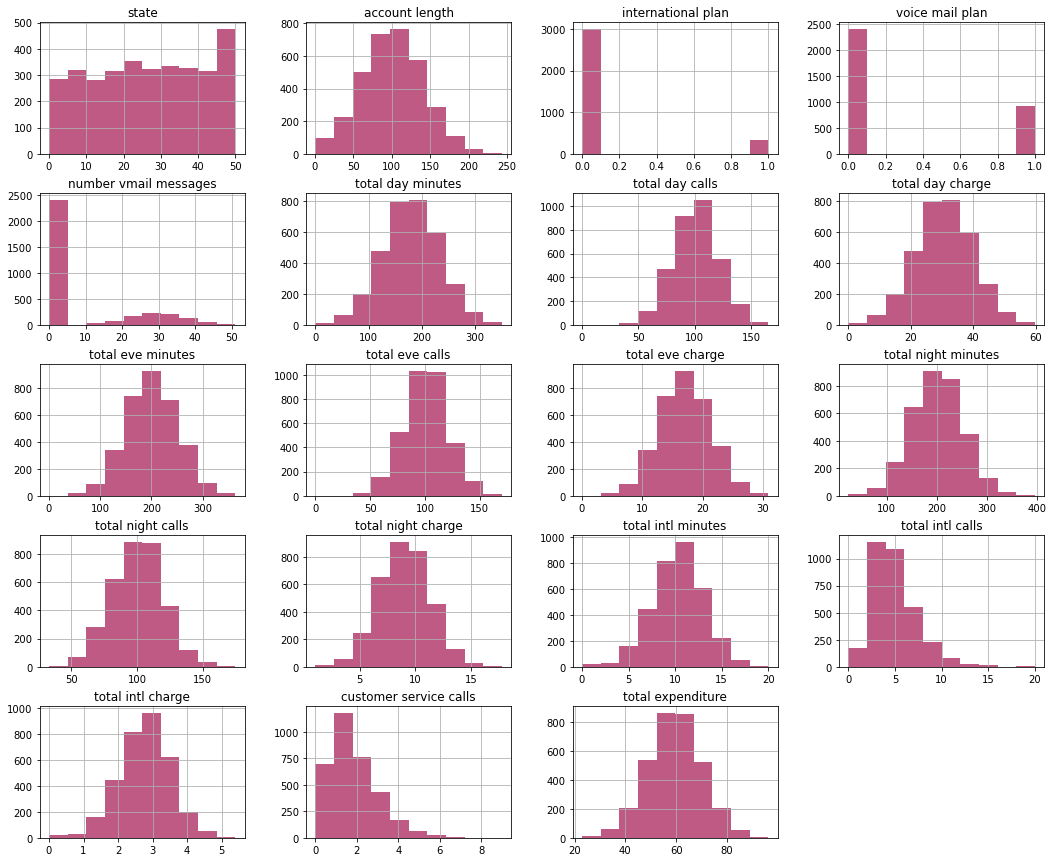

In [14]:
# The Distribution of Features

df.drop(columns='churn').hist(figsize=(18, 15), color="#BE5A83");


We notice based on this output that the features have different scalings, and we especially take note that not all of them are <b> normally distributed </b>

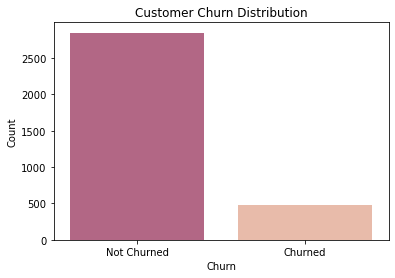

In [15]:
# Display the count of churned and non-churned counts in a bar chart 

churn_counts = df["churn"].value_counts()

# Plot the bar chart
sns.countplot(x="churn", data=df, palette=custom_colors)
plt.xlabel("Churn")
plt.ylabel("Count")
plt.title("Customer Churn Distribution")
plt.xticks([0,1], ["Not Churned", "Churned"])
plt.show()

In [16]:
# This function will be used to find the percentage value in different columns
def calculate_percentage(column):
    percentages = column.value_counts(normalize=True) * 100
    return percentages

In [17]:
churn_percentages = calculate_percentage(df["churn"])
print(churn_percentages)

0    85.508551
1    14.491449
Name: churn, dtype: float64


We can take note that majority of the customers 85.5% had not churned (2850), while 14.5 % had churned(483). 

In [18]:
# Count the number of churned and non-churned customers by international plan
churn_intl_plan = df.groupby(['churn', 'international plan']).size().unstack()
total_churn_itl = churn_intl_plan.sum(axis=1)  # Calculate the total count for each churn category
percentage_intl_plan = churn_intl_plan.div(total_churn_itl, axis=0) * 100  # Calculate the percentage
percentage_intl_plan

international plan,0,1
churn,,
0,93.473684,6.526316
1,71.635611,28.364389


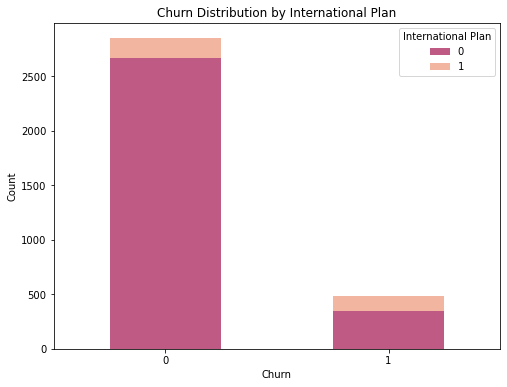

In [19]:
# Display as a bar chart

# Plots a stacked bar chart to visualize the relationship
churn_intl_plan.plot(kind='bar', stacked=True, figsize=(8, 6), color=custom_colors)

plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution by International Plan')
plt.xticks(rotation=0)
plt.legend(title='International Plan')

plt.show()

Observations:

- Among customers who did not churn (churn=False), approximately 93.50% have "no" international plan, and 6.50% have "yes" international plan.
- Among customers who churned (churn=True), approximately 71.64% have "no" international plan, and 28.36% have "yes" international plan.

In [20]:
# Count the number of churned and non-churned customers by voicemail plan
churn_voicemail = df.groupby(['churn', 'voice mail plan']).size().unstack()
total_churn_vm= churn_voicemail.sum(axis=1)  # Calculate the total count for each churn category
percentage_vm = churn_voicemail.div(total_churn_vm, axis=0) * 100  # Calculate the percentage
percentage_vm

voice mail plan,0,1
churn,,
0,70.456140,29.543860
1,83.436853,16.563147


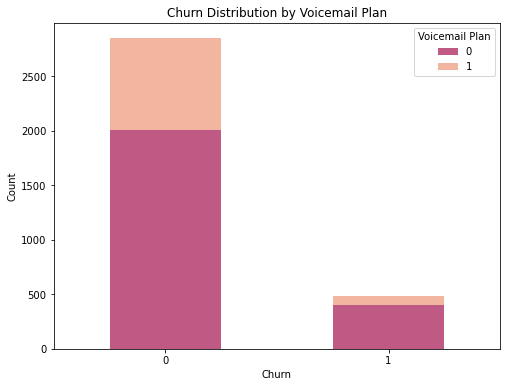

In [21]:
# Display as a bar chart

# Plot a stacked bar chart to visualize the relationship
churn_voicemail.plot(kind='bar', stacked=True, figsize=(8, 6), color=custom_colors)

plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution by Voicemail Plan')
plt.xticks(rotation=0)
plt.legend(title='Voicemail Plan')

plt.show()

Observations:

- Churned customers (True): 83.44% did not have a voice mail plan (no), while 16.56% had a voice mail plan (yes).

- Non-churned customers (False): 70.46% did not have a voice mail plan (no), and 29.54% had a voice mail plan (yes).

In [22]:
churn_area_code = df.groupby('area code')['churn'].value_counts().unstack()
churn_area_code

churn,0,1
area code,,
408,716,122
415,1419,236
510,715,125


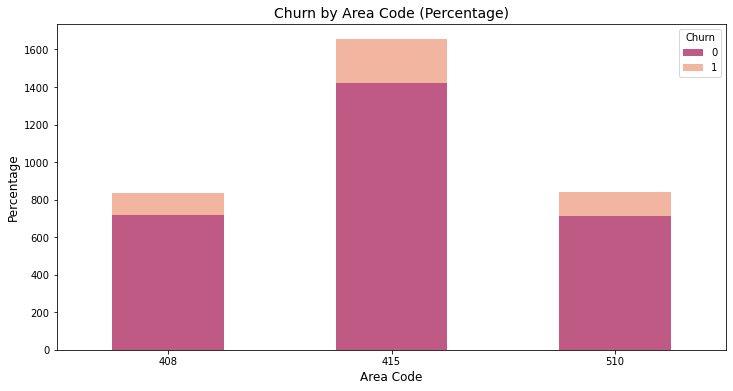

In [23]:
churn_area_code.plot(kind='bar', stacked=True, figsize=(12, 6), color=custom_colors)
plt.xlabel('Area Code', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Churn by Area Code (Percentage)', fontsize=14)
plt.legend(title='Churn', loc='upper right')
plt.xticks(rotation=0)
plt.show()

Observations:


1. In area code <u>408</u>, there are 716 customers who did not churn, while 122 customers churned. The churn rate for this area code is relatively lower compared to the non-churn rate.

2. Area code <u>415</u> has a higher number of non-churned customers, with 1419 customers, compared to 236 customers who churned. 

3. In area code <u>510</u>, there are 715 non-churned customers, while 125 customers churned. 

### <b> Multivariate Analysis</b>

In [24]:
# Creates a Correlation Matrix & then displays it as a heatmap
corr_matrix = df.corr()
corr_matrix

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total expenditure
state,1.000000,0.003678,-0.004597,-0.031664,-0.027762,-0.006737,-0.000764,-0.006736,0.013682,-0.016268,0.013674,0.024576,0.007458,0.024572,-0.007834,0.013967,-0.007819,-0.025861,0.007780,0.004437
account length,0.003678,1.000000,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541,0.001454
international plan,-0.004597,0.024735,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852,0.048415
voice mail plan,-0.031664,0.002918,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148,0.008585
number vmail messages,-0.027762,-0.004628,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728,0.009766
total day minutes,-0.006737,0.006216,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151,0.884754
total day calls,-0.000764,0.038470,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459,0.003673
total day charge,-0.006736,0.006214,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151,0.884757
total eve minutes,0.013682,-0.006757,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796,0.413143
total eve calls,-0.016268,0.019260,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233,0.009392


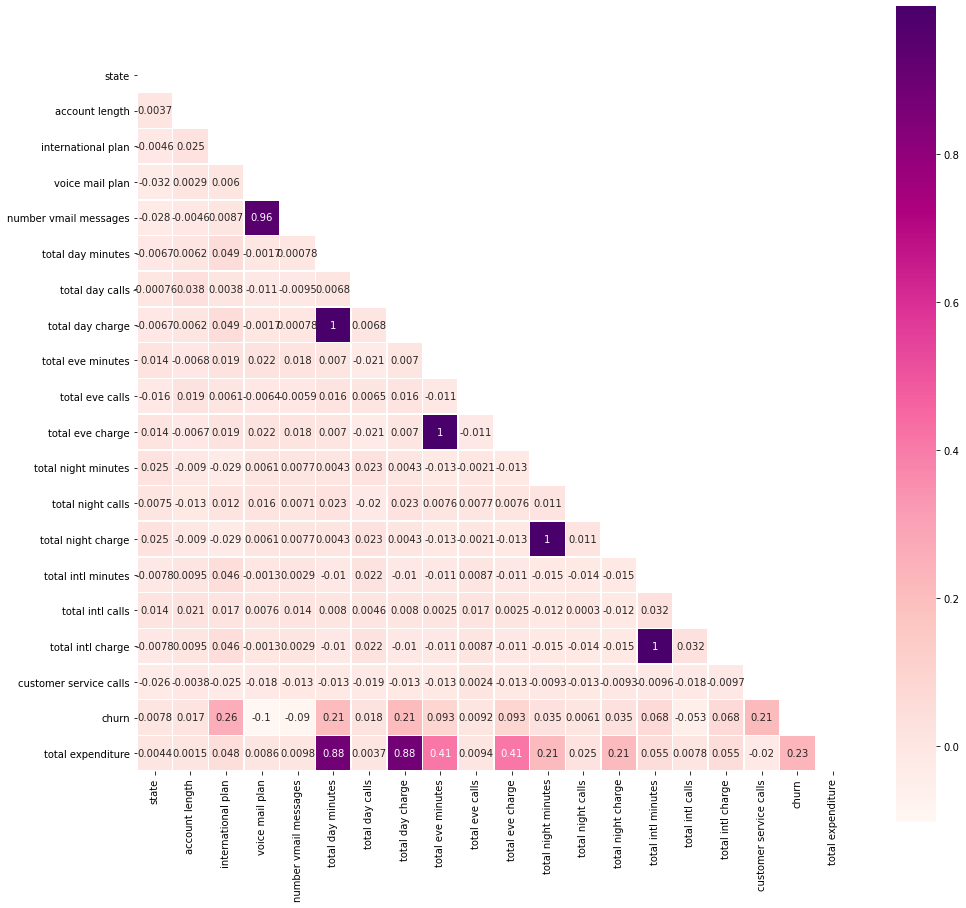

In [25]:
# Display as a heat map
#using a heatmap to show correlation
fig, ax = plt.subplots(figsize=(16,15))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), linewidths=0.5, mask=mask, square=True, ax=ax, annot=True, cmap="RdPu");

In [26]:
def check_multicollinearity(df, threshold=0.95):
    corr_matrix = df.select_dtypes(include=np.number).corr().abs()
    correlated_pairs = set()
    for col in corr_matrix:
        correlated_cols = corr_matrix.index[corr_matrix[col] > threshold]
        correlated_pairs.update([(min(col, correlated_col), max(col, correlated_col)) for correlated_col in correlated_cols if col != correlated_col])
    for pair in correlated_pairs:
        print(f"{pair[0]} --- {pair[1]}")
    return set(df.columns) & set(col for pair in correlated_pairs for col in pair)

# Call the function to check multicollinearity
multicollinear_features = check_multicollinearity(df)


total intl charge --- total intl minutes
total night charge --- total night minutes
total eve charge --- total eve minutes
total day charge --- total day minutes
number vmail messages --- voice mail plan


##### <b> <u> Observations: </u></b>

The following pairs of features exhibit high correlation above the threshold of 0.95:

<ul>
<li> <code>total day minutes</code> and <code>total day charge</code></li>
<li> <code>total eve minutes</code> and <code>total eve charge</code></li>
<li> <code>total night minutes</code> and <code>total night charge</code></li>
<li> <code>total intl minutes</code> and <code>total intl charge</code></li>
</ul>


We can therefore take note that: 

There is a strong positve correlation between : 

- total day minutes and total day charge. This suggests that as the number of minutes spent on day calls increases, the corresponding charge for those calls also increases.

- total eve minutes and total eve charge. This indicates that higher evening call durations are associated with higher charges for those calls.

- total intl minutes is highly correlated with total intl charge. This indicates that longer international call durations are associated with higher charges for those calls.


In order to deal with the multicollinearity in the features, one of the features from each pair will have to be dropped. 



In [27]:
# Drop some columns in order to deal with multicollinearity

df = df.drop(columns=['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes'])
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day calls',
       'total day charge', 'total eve calls', 'total eve charge',
       'total night calls', 'total night charge', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn',
       'total expenditure'],
      dtype='object')

#### <b> Data Preparation for ML Purposes 

#### Setting the target </b>

In [28]:
X= df.drop('churn', axis=1)
y = df.churn
X.head() #Inspect new df

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,total expenditure
0,16,128,415,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,75.56
1,35,107,415,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,59.24
2,31,137,415,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,62.29
3,35,84,408,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,66.80
4,36,75,415,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,52.09


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)


In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2499 entries, 1066 to 1346
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   2499 non-null   int64  
 1   account length          2499 non-null   int64  
 2   area code               2499 non-null   object 
 3   international plan      2499 non-null   int64  
 4   voice mail plan         2499 non-null   int64  
 5   number vmail messages   2499 non-null   int64  
 6   total day calls         2499 non-null   int64  
 7   total day charge        2499 non-null   float64
 8   total eve calls         2499 non-null   int64  
 9   total eve charge        2499 non-null   float64
 10  total night calls       2499 non-null   int64  
 11  total night charge      2499 non-null   float64
 12  total intl calls        2499 non-null   int64  
 13  total intl charge       2499 non-null   float64
 14  customer service calls  2499 non-null

In [31]:
X_train = X_train.drop('area code', axis=1).select_dtypes(include=['int', 'float'])
X_test = X_test.drop('area code', axis=1).select_dtypes(include=['int', 'float'])


In [32]:
X_train.info() # inspect the changes made in the cell above

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2499 entries, 1066 to 1346
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   2499 non-null   int64  
 1   account length          2499 non-null   int64  
 2   international plan      2499 non-null   int64  
 3   voice mail plan         2499 non-null   int64  
 4   number vmail messages   2499 non-null   int64  
 5   total day calls         2499 non-null   int64  
 6   total day charge        2499 non-null   float64
 7   total eve calls         2499 non-null   int64  
 8   total eve charge        2499 non-null   float64
 9   total night calls       2499 non-null   int64  
 10  total night charge      2499 non-null   float64
 11  total intl calls        2499 non-null   int64  
 12  total intl charge       2499 non-null   float64
 13  customer service calls  2499 non-null   int64  
 14  total expenditure       2499 non-null

In [33]:
# Scale the data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### <b>Logistic Regression Model </b>